# Algoritmo OneVsRest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import precision_score, make_scorer
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from imblearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

## Creación del modelo
Cargar los datos

In [2]:
datos = pd.read_csv('train_Data.csv', sep=',', encoding = 'utf-8')
def drop_na(df):
    return df[df['non_tokenized_entities'] != '']

datos = drop_na(datos)
datos=datos.drop(["Unnamed: 0"], axis = 1)
datos

,problems_described,tokenized_abstracts,non_tokenized_abstracts,non_tokenized_entities,tokenized_entities
0,4,"['placebo', 'control', 'trial', 'xamoterol', '...",placebo control trial xamoterol versus digoxin...,xamoterol digoxin heart xamoterol digoxin xamo...,"['xamoterol', 'digoxin', 'heart', 'xamoterol',..."
1,1,"['signific', 'blast', 'lowcellcount', 'cerebro...",signific blast lowcellcount cerebrospin fluid ...,blast lowcellcount cerebrospin fluid specimen ...,"['blast', 'lowcellcount', 'cerebrospin', 'flui..."
2,5,"['obstruct', 'sleep', 'apnea', 'follow', 'topi...",obstruct sleep apnea follow topic oropharyng a...,oropharyng airway upper airway sem oropharyng ...,"['oropharyng', 'airway', 'upper', 'airway', 's..."
3,5,"['experi', 'sarn', 'centrifug', 'pump', 'ventr...",experi sarn centrifug pump ventricular assist ...,sarn centrifug ventricular sarn centrifug pump...,"['sarn', 'centrifug', 'ventricular', 'sarn', '..."
4,3,"['fine', 'surfac', 'structur', 'intraspin', 'n...",fine surfac structur intraspin neurenter cyst ...,fine surfac intraspin neurenter cyst electron ...,"['fine', 'surfac', 'intraspin', 'neurenter', '..."
...,...,...,...,...,...
9595,1,"['chondrosarcoma', 'soft', 'tissu', 'differ', ...",chondrosarcoma soft tissu differ subgroup chon...,chondrosarcoma soft tissu chondrosarcoma soft ...,"['chondrosarcoma', 'soft', 'tissu', 'chondrosa..."
9596,4,"['prolong', 'ventricular', 'refractori', 'clas...",prolong ventricular refractori class ia antiar...,ventricular class ia ventricular procainamid q...,"['ventricular', 'class', 'ia', 'ventricular', ..."
9597,1,"['regress', 'atyp', 'histiocytosi', 'aberr', '...",regress atyp histiocytosi aberr prothymocyt di...,prothymocyt tcell receptor nodal cd1 histiocyt...,"['prothymocyt', 'tcell', 'receptor', 'nodal', ..."
9598,2,"['role', 'gastric', 'resect', 'manag', 'multic...",role gastric resect manag multicentr argyrophi...,gastric multicentr argyrophil gastric carcinoi...,"['gastric', 'multicentr', 'argyrophil', 'gastr..."


Separamos los datos entre palabras y categoría

In [3]:
abstracts = datos['tokenized_abstracts']
entities = datos['tokenized_entities']
Y_train = datos["problems_described"]

In [4]:
# Definimos la metrica
custom_scorer = make_scorer(precision_score, greater_is_better=True,  average='micro')

## Pipeline1
Creamos el modelo

In [5]:
p1_tfidf_subsampling_pipe = imbpipeline(steps = [
    ("tf_idf_vec",TfidfVectorizer()),
    ("sampling", EditedNearestNeighbours()),
    ("ovsr",OneVsRestClassifier(SVC(kernel="poly")))
])
p1_tfidf_subsampling_pipe

Pipeline(steps=[('tf_idf_vec', TfidfVectorizer()),
                ('sampling', EditedNearestNeighbours()),
                ('ovsr', OneVsRestClassifier(estimator=SVC(kernel='poly')))])

In [6]:
p2_tfidf_oversampling_pipe = imbpipeline(steps = [
    ("tf_idf_vec",TfidfVectorizer()),
    ("sampling", SMOTEENN(random_state=28)),
    ("ovsr", OneVsRestClassifier(SVC(kernel="poly")))
])
p2_tfidf_oversampling_pipe

Pipeline(steps=[('tf_idf_vec', TfidfVectorizer()),
                ('sampling', SMOTEENN(random_state=28)),
                ('ovsr', OneVsRestClassifier(estimator=SVC(kernel='poly')))])

In [7]:
p3_count_subsampling_pipe = imbpipeline(steps = [
    ("count_vec",CountVectorizer()),
    ("sampling", EditedNearestNeighbours()),
    ("ovsr", OneVsRestClassifier(SVC(kernel="poly")))
])
p3_count_subsampling_pipe

Pipeline(steps=[('count_vec', CountVectorizer()),
                ('sampling', EditedNearestNeighbours()),
                ('ovsr', OneVsRestClassifier(estimator=SVC(kernel='poly')))])

In [8]:
p4_count_oversampling_pipe = imbpipeline(steps = [
    ("tf_idf_vec", CountVectorizer()),
    ("sampling", SMOTEENN(random_state=28)),
    ("ovsr", OneVsRestClassifier(SVC(kernel="poly")))
])
p4_count_oversampling_pipe

Pipeline(steps=[('tf_idf_vec', CountVectorizer()),
                ('sampling', SMOTEENN(random_state=28)),
                ('ovsr', OneVsRestClassifier(estimator=SVC(kernel='poly')))])

In [9]:
#param_grid = {"ovsr__estimator__C": [1,2,3,4,8],"ovsr__estimator__kernel": ["poly","rbf"],"ovsr__estimator__degree":[1,2,3,4], 
#"tf_id_vec__ngram_range":[(1,1),(1,2)}
param_grid = {"ovsr__estimator__C": [1,2],"ovsr__estimator__kernel": ["poly","rbf"],"ovsr__estimator__degree":[1,2]}
#param_grid = {"ovsr__estimator__C": [1],"ovsr__estimator__kernel": ["poly"],"ovsr__estimator__degree":[1]}

In [10]:
grid_selector1 = GridSearchCV(estimator = p1_tfidf_subsampling_pipe, param_grid = param_grid, 
                              cv=2, verbose=3,scoring=custom_scorer)
grid_selector2 = GridSearchCV(estimator = p2_tfidf_oversampling_pipe, param_grid = param_grid, 
                              cv=2, verbose=3,scoring=custom_scorer)
grid_selector3 = GridSearchCV(estimator = p3_count_subsampling_pipe, param_grid = param_grid, 
                              cv=2, verbose=3,scoring=custom_scorer)
grid_selector4 = GridSearchCV(estimator = p4_count_oversampling_pipe, param_grid = param_grid, 
                              cv=2, verbose=3,scoring=custom_scorer)

In [11]:
grid_selector1.fit(abstracts,Y_train)
grid_selector1.best_params_

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=poly;, score=0.458 total time=  27.0s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=poly;, score=0.470 total time=  26.6s
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=rbf;, score=0.379 total time=  39.3s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=rbf;, score=0.387 total time=  37.5s
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=poly;, score=0.263 total time=  43.4s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=poly;, score=0.263 total time=  41.4s
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=rbf;, score=0.379 total time=  51.1s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimat

{'ovsr__estimator__C': 2,
 'ovsr__estimator__degree': 1,
 'ovsr__estimator__kernel': 'poly'}

In [12]:
grid_selector2.fit(abstracts,Y_train)
grid_selector2.best_params_

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=poly;, score=0.525 total time= 1.2min
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=poly;, score=0.521 total time= 1.3min
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=rbf;, score=0.525 total time= 2.1min
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=rbf;, score=0.525 total time= 2.1min
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=poly;, score=0.500 total time= 3.6min
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=poly;, score=0.504 total time= 3.4min
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=rbf;, score=0.525 total time= 2.2min
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimat

{'ovsr__estimator__C': 2,
 'ovsr__estimator__degree': 1,
 'ovsr__estimator__kernel': 'rbf'}

In [13]:
grid_selector3.fit(entities,Y_train)
grid_selector3.best_params_

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=poly;, score=0.354 total time=   2.8s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=poly;, score=0.371 total time=   3.0s
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=rbf;, score=0.334 total time=   4.4s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=rbf;, score=0.341 total time=   4.7s
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=poly;, score=0.223 total time=   3.6s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=poly;, score=0.271 total time=   4.2s
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=rbf;, score=0.334 total time=   4.5s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimat

{'ovsr__estimator__C': 2,
 'ovsr__estimator__degree': 1,
 'ovsr__estimator__kernel': 'poly'}

In [14]:
grid_selector4.fit(entities,Y_train)
grid_selector4.best_params_

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=poly;, score=0.496 total time=   7.2s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=poly;, score=0.480 total time=   7.9s
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=rbf;, score=0.483 total time=  10.9s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=1, ovsr__estimator__kernel=rbf;, score=0.485 total time=  11.8s
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=poly;, score=0.474 total time=   9.4s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=poly;, score=0.454 total time=  10.6s
[CV 1/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimator__kernel=rbf;, score=0.483 total time=  11.2s
[CV 2/2] END ovsr__estimator__C=1, ovsr__estimator__degree=2, ovsr__estimat

{'ovsr__estimator__C': 2,
 'ovsr__estimator__degree': 1,
 'ovsr__estimator__kernel': 'poly'}

Test Report for Multinomial NB Pipe 1
               precision    recall  f1-score   support

           1       0.71      0.73      0.72      2103
           2       0.30      0.99      0.46       994
           3       0.68      0.33      0.45      1280
           4       0.68      0.77      0.72      2029
           5       0.70      0.27      0.39      3194

    accuracy                           0.56      9600
   macro avg       0.61      0.62      0.55      9600
weighted avg       0.65      0.56      0.55      9600



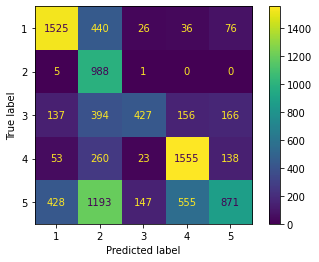

In [15]:
y_pred1 = grid_selector1.predict(abstracts)
report_pipe_p1 = classification_report(Y_train, y_pred1)
print("Test Report for Multinomial NB Pipe 1\n", report_pipe_p1)
cm = confusion_matrix(Y_train, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= grid_selector1.classes_)
disp.plot()

Test Report for Multinomial NB Pipe 2
               precision    recall  f1-score   support

           1       0.73      0.81      0.77      2103
           2       0.49      0.94      0.64       994
           3       0.45      0.92      0.60      1280
           4       0.66      0.87      0.75      2029
           5       0.97      0.01      0.02      3194

    accuracy                           0.58      9600
   macro avg       0.66      0.71      0.56      9600
weighted avg       0.73      0.58      0.48      9600



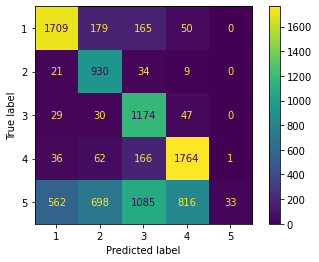

In [16]:
y_pred2 = grid_selector2.predict(abstracts)
report_pipe_p2 = classification_report(Y_train, y_pred2)
print("Test Report for Multinomial NB Pipe 2\n", report_pipe_p2)
cm = confusion_matrix(Y_train, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= grid_selector2.classes_)
disp.plot()

Test Report for Multinomial NB Pipe 3
               precision    recall  f1-score   support

           1       0.75      0.58      0.65      2103
           2       0.22      0.98      0.36       994
           3       0.55      0.22      0.31      1280
           4       0.67      0.68      0.67      2029
           5       0.58      0.19      0.28      3194

    accuracy                           0.46      9600
   macro avg       0.55      0.53      0.46      9600
weighted avg       0.59      0.46      0.46      9600



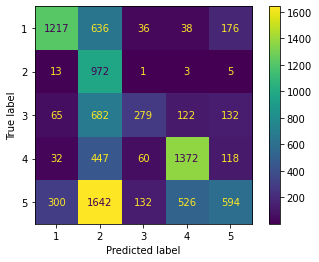

In [17]:
y_pred3 = grid_selector3.predict(entities)
report_pipe_p3 = classification_report(Y_train, y_pred3)
print("Test Report for Multinomial NB Pipe 3\n", report_pipe_p3)
cm = confusion_matrix(Y_train, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= grid_selector3.classes_)
disp.plot()

Test Report for Multinomial NB Pipe 4
               precision    recall  f1-score   support

           1       0.71      0.74      0.72      2103
           2       0.44      0.85      0.58       994
           3       0.37      0.81      0.50      1280
           4       0.63      0.77      0.69      2029
           5       0.76      0.04      0.07      3194

    accuracy                           0.53      9600
   macro avg       0.58      0.64      0.52      9600
weighted avg       0.64      0.53      0.46      9600



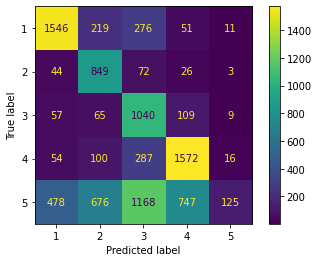

In [18]:
y_pred4 = grid_selector4.predict(entities)
report_pipe_p4 = classification_report(Y_train, y_pred4)
print("Test Report for Multinomial NB Pipe 4\n", report_pipe_p4)
cm = confusion_matrix(Y_train, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= grid_selector4.classes_)
disp.plot()

## Guardar Modelo

In [19]:
Escogemos el modelo que mejor precision tiene, este es el de la pipeline 2, asi que ese es el que guardaremos 
#file = open("OneVsRest.joblib","wb")
#joblib.dump(final_model,file)
#file.close()